2nd Homework

In [342]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from math import pow

EXERCISE 6

a)

In [343]:
# Generate data
mean = [0,0]
cov = [[1,0],[0,1]]

X = np.random.uniform(0,10,size=(200,2))

#Define the the model
def f(X,theta):
    return theta[0] + theta[1]*X[:,0] + theta[2]*X[:,1]+ theta[3]*X[:,0]*X[:,1]

theta = [3,2,1,1]
y = f(X,theta)
y = y + np.random.normal(0,np.sqrt(0.05),len(X))

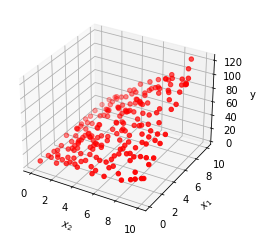

In [344]:
#plot X data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y,c='r',marker='o')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('y')
plt.show()

b)

In [345]:
φT=np.array([np.ones(200),X[:,0],X[:,1]])
φ=np.transpose(φT)
XTX=np.dot(φT,φ)
XTXinv=np.linalg.inv(XTX)
XTy=np.dot(φT,y)
theta_est=np.dot(XTXinv,XTy)
print(theta_est)

[-21.49151251   6.75597764   6.10033579]


c)

In [346]:
y_est= theta_est[0]+theta_est[1]*φ[:,1]+theta_est[2]*φ[:,2]
MSE=np.mean((y-y_est)**2)
print(MSE)

62.23886355077388


d)

In [347]:
φT=np.array([np.ones(200),X[:,0],X[:,1],X[:,0]*X[:,1]])
φ=np.transpose(φT)

e)

In [348]:
XTX=np.dot(φT,φ)
XTXinv=np.linalg.inv(XTX)
XTy=np.dot(φT,y)
theta_est=np.dot(XTXinv,XTy)
print(theta_est)

[3.02072744 1.99744547 1.00042355 0.99915592]


f)

In [349]:
y_est= theta_est[0]+theta_est[1]*φ[:,1]+theta_est[2]*φ[:,2]+theta_est[3]*φ[:,3]
MSE=np.mean((y-y_est)**2)
print(MSE)

0.042363231525380095


g)

The MSE in question (c) is way higher than the MSE in question (f). The model in (f) uses the actual equation of the exercise, so the lower MSE is justified. On the other hand in (c), the model is transformed,so that it becomes linear. Hence, the higher MSE value is justified, as the model is modified. The linear transformation is usefull in certain situations and sometimes the higher MSE value may not be the only determinant.

EXERCISE 7

a)

In [350]:
X=np.random.uniform(-2,2, size=(2000,2))
y= (X[:,1]**2)-(X[:,0]**2)

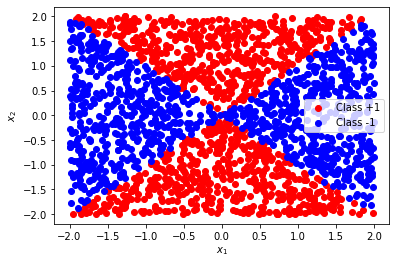

In [351]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[y>0,0],X[y>0,1],c='red', label='Class +1')
ax.scatter(X[y<0,0],X[y<0,1],c='blue', label='Class -1')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.legend()
plt.show()

b)

In [352]:
φT=np.array([X[:,0]**2, X[:,1]**2])
φ=np.transpose(φT)

c)

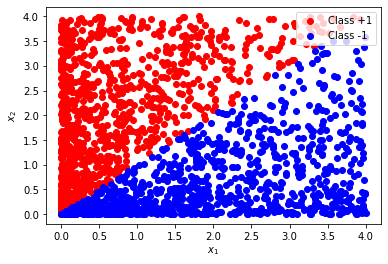

In [353]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(φ[y>0,0],φ[y>0,1],c='r', label='Class +1')
ax.scatter(φ[y<0,0],φ[y<0,1],c='b', label='Class -1')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.legend()
plt.show()

It can be observed that the two classes are now linearly separable, due to the tranformation. The original problem as shown in (a) showed that the classes cannot be linearly separated. The transformation with x1^2 and x2^2 made all values positive and separated them clearly into two classes with a line that separates them perfectly.

d)

In [354]:
φT=np.array([np.ones(2000), X[:,0]**2, X[:,1]**2])
φ=np.transpose(φT)
y_est=np.ones(2000)
y_est[y<0]=-1

In [355]:
XTX=np.dot(φT,φ)
XTXinv=np.linalg.inv(XTX)
XTy=np.dot(φT,y_est)
theta_est=np.dot(XTXinv,XTy)
print(theta_est)

[-0.02911856 -0.4686682   0.48994264]


EXERCISE 8

a)

In [356]:
m1=[0,0]
s1=[[10,0], [0,10]]
m2=[15,15]
s2=[[1,0],[0,1]]

x1=np.random.multivariate_normal(m1,s1,1000)
x2=np.random.multivariate_normal(m2,s2,20)

y1=np.ones(1000)
y2=-1*(np.ones(20))

x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

b)

In [357]:
XT=np.array([np.ones(1020), x[:,0], x[:,1]])
X=np.transpose(XT)
XTX=np.dot(XT,X)
XTXinv=np.linalg.inv(XTX)
XTy=np.dot(XT,y)
theta_est=np.dot(XTXinv,XTy)
print(theta_est)

[ 0.97912523 -0.02994529 -0.03050549]


c)

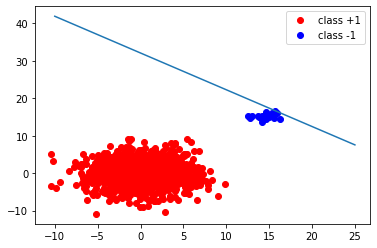

In [358]:
plt.plot(X[y>0,1],X[y>0,2],'o',c='r', label ='class +1' )
plt.plot(X[y<=0,1],X[y<=0,2],'o',c='b', label = 'class -1')
x1 = np.linspace(-10, 25, 6)
x2=-theta_est[0]/theta_est[2]-theta_est[1]/theta_est[2]*x1
plt.plot(x1,x2)
plt.legend()

d)

In (c) the plot depicts the transformed function φ(χ), which can be linearly separated. However, the data that are classified in +1 are 1000 and the data that are classified in -1 are 20. This creates a problem, as the LS criterion minimizes the cost function J(theta), but does not separate the classes accurately because of the different number of data in each class. The cost function uses the appropriate theta to optimize the result. Hence, with the optimal theta, the result will try to optimize for the class+1 with n1=1000 and will not take that much considaration in the class -1 with n2=20. The result does not correspond to the solution of this problem, as sometimes that LS criterion is not suitable for each case. (big difference in number of data in each class.)